In [23]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings

%matplotlib inline 
warnings.filterwarnings('ignore')
#print(os.listdir("../"))

In [24]:
data_file = "SuperMarketData.csv"
df = pd.read_csv(data_file)
df.head()

,CustomerID,Gender,Age,Monthly Income (kRs),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
df.rename(index=str, columns={'Monthly Income (kRs)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


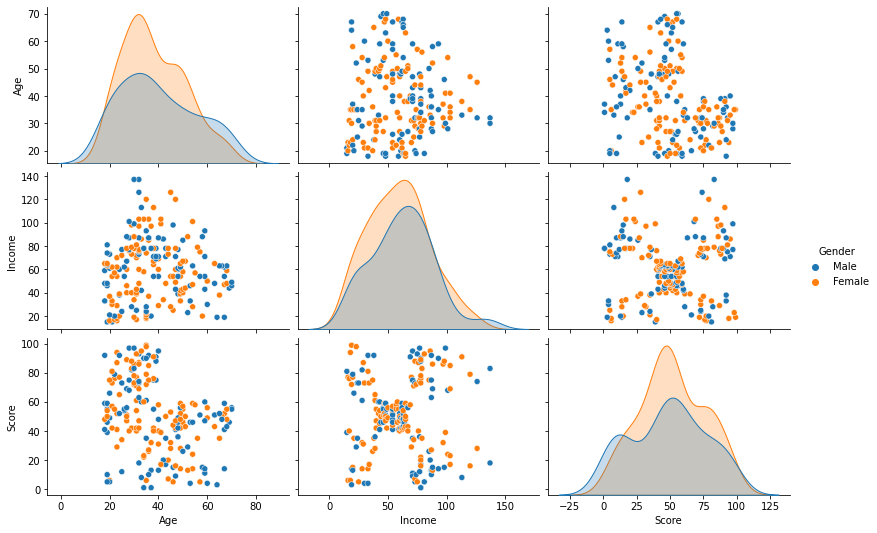

In [26]:
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

In [27]:
# From the above plot we see that gender has no direct relation to segmenting customers. 
#That's why we can drop it and move on with other features which is why 
#we will X parameter from now on.
X = df.drop(['CustomerID', 'Gender'], axis=1)
X.head()

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [28]:
from sklearn.cluster import KMeans

clusters = []
end_range = 11
for i in range(1, end_range):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)  #inertia is referred as sum-of-squared Error 

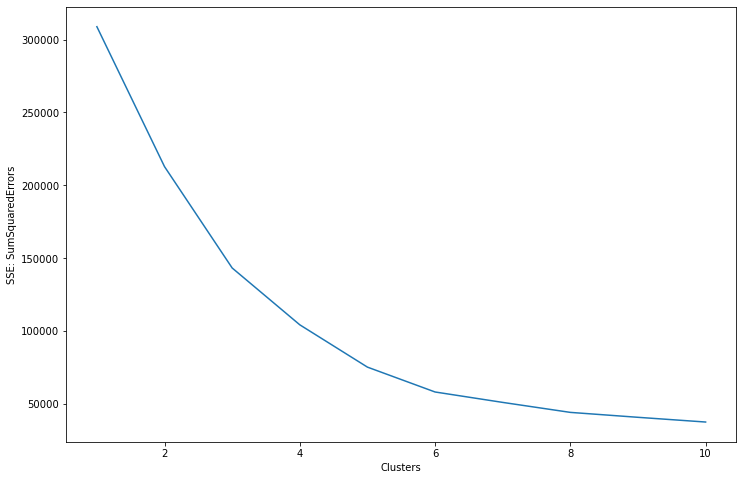

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.lineplot(x=list(range(1, end_range)), y=clusters, ax=ax)
ax.set_xlabel('Clusters')
ax.set_ylabel('SSE: SumSquaredErrors')
plt.show()

Elbow method  --> select the cluster when there is a significant change in inertia. 
From the graph, this may be either 3 or 5. 
   
   - Evaluating results in graph for 3 and 5

[0 1 2]
   Age  Income  Score  Labels
0   19      15     39       1
1   21      15     81       1
2   20      16      6       1
3   23      16     77       1
4   31      17     40       1


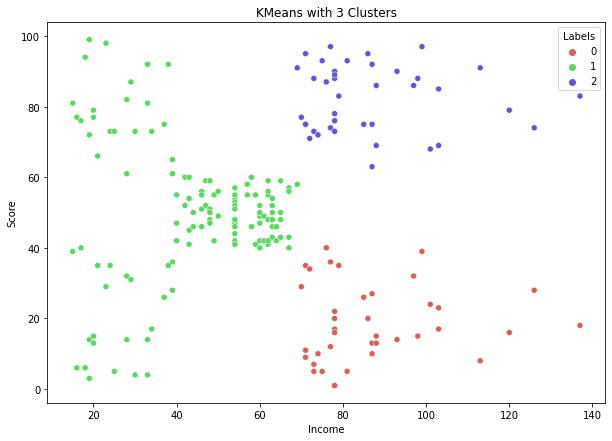

In [30]:
#clusters = 3

km_3 = KMeans(n_clusters=3).fit(X)
X['Labels'] = km_3.labels_
print(np.unique(X.Labels))
print(X.head())

plt.figure(figsize=(10, 7))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

[0 1 2 3 4]
   Age  Income  Score  Labels
0   19      15     39       4
1   21      15     81       2
2   20      16      6       4
3   23      16     77       2
4   31      17     40       4


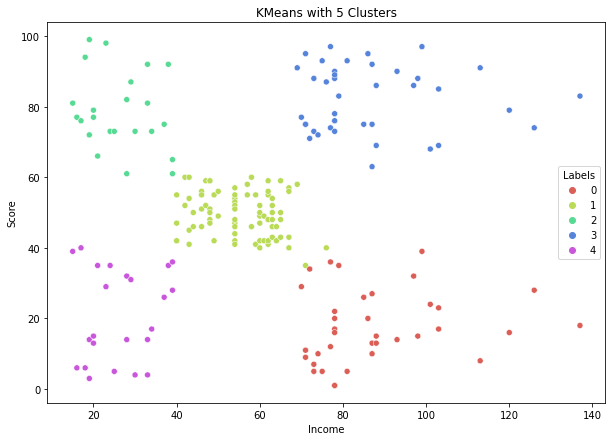

In [34]:
#clusters = 5

km_5 = KMeans(n_clusters=5).fit(X)
X['Labels'] = km_5.labels_
print(np.unique(X.Labels))
print(X.head())

plt.figure(figsize=(10, 7))

sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

From the plots, 5 cluster seems better than the 3 ones. 
As this is a unsupervised problem we can't really know for sure which one is the best in real life but by looking at the data it's safe to say that 5 would be our choice.

Analysis of 5 clusters:

    Label 0 is low income and low spending
    Label 1 is high income and high spending
    Label 2 is mid income and mid spending
    Label 3 is high income and low spending
    Label 4 is low income and high spending
